<a href="https://colab.research.google.com/github/solomon54/Machine-Learning-Regression-Models-using-House-Price-Dataset/blob/main/Regrassion_Class_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/solomon54/Machine-Learning-Regression-Models-using-House-Price-Dataset/main/Housing%20Price.csv")

print("The first 14 rows")
df.head(14)

The first 14 rows


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
print("the last 14 rows ")
df.tail(14)

the last 14 rows 


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
531,2233000,5300,3,1,1,no,no,no,no,yes,0,yes,unfurnished
532,2135000,3000,2,1,1,no,no,no,no,no,0,no,unfurnished
533,2100000,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
534,2100000,3000,4,1,2,yes,no,no,no,no,0,no,unfurnished
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished


In [8]:
from sklearn.preprocessing import LabelEncoder

In [12]:
cat=df.select_dtypes(include=['object']).columns
cat

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [27]:
le = LabelEncoder()
for col in cat:
    df[col] = le.fit_transform(df[col])

print(df.head(10))

      price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000   7420         4          2        3         1          0   
1  12250000   8960         4          4        4         1          0   
2  12250000   9960         3          2        2         1          0   
3  12215000   7500         4          2        2         1          0   
4  11410000   7420         4          1        2         1          1   
5  10850000   7500         3          3        1         1          0   
6  10150000   8580         4          3        4         1          0   
7  10150000  16200         5          3        2         1          0   
8   9870000   8100         4          1        2         1          1   
9   9800000   5750         3          2        4         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3      

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns

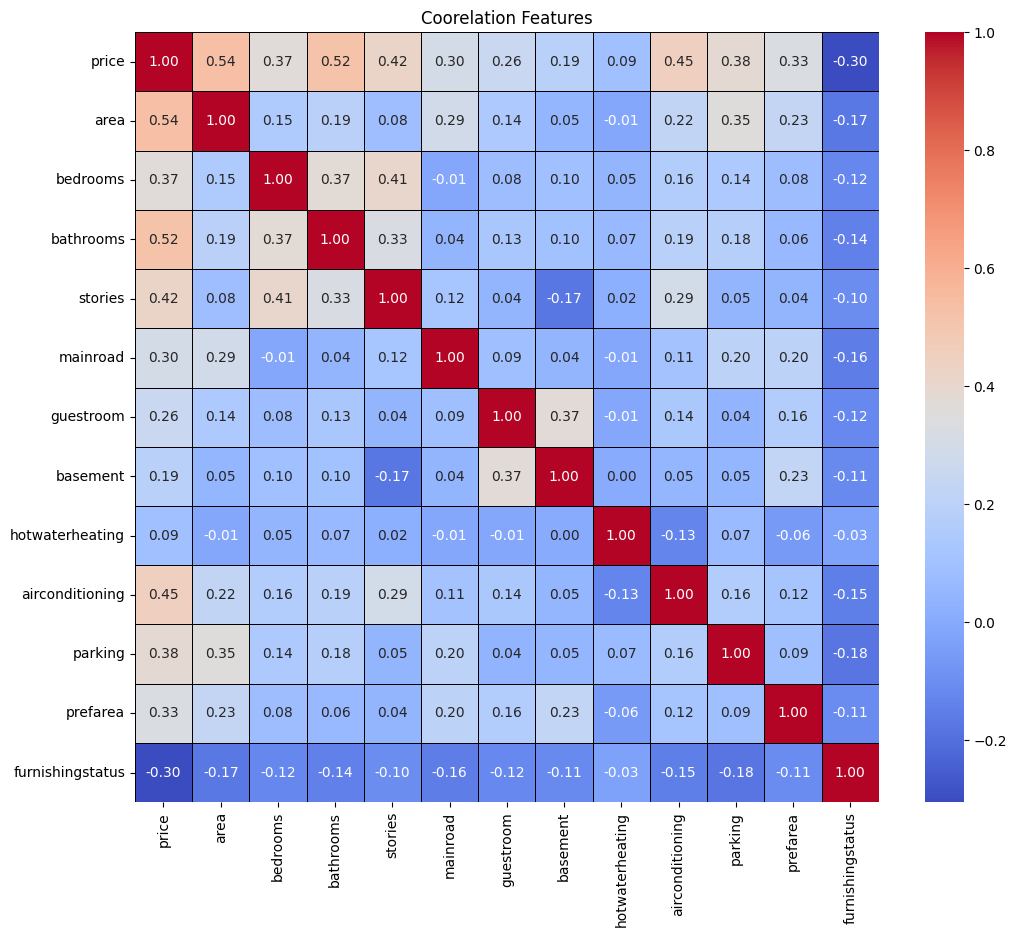

In [37]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black',  )
plt.title("Coorelation Features")
plt.show()


- A value close to 1 indicates a strong positive correlation (as one variable increases, the other tends to increase).
A value close to -1 indicates a strong negative correlation (as one variable increases, the other tends to decrease).
A value close to 0 indicates a weak or no correlation.
Looking at the price column (our target variable):

## Strong Positive Correlations with Price (r > 0.5):

- area (0.54): There's a strong positive relationship between the area of the house and its price. Larger houses tend to have higher prices.
bathrooms (0.52): More bathrooms are strongly associated with higher house prices.
- Moderate Positive Correlations with Price (0.3 < r <= 0.5):

- stories (0.42): The number of stories has a moderate positive correlation with price.
bedrooms (0.37): More bedrooms show a moderate positive correlation with price.
- airconditioning (0.45): Houses with air conditioning tend to have moderately higher prices.
- parking (0.38): The presence of parking is moderately positively correlated with price.
prefarea (0.33): Houses in a preferred area tend to have moderately higher prices.
- mainroad (0.30): Being on a main road shows a moderate positive correlation with price.

## Weak or Negative Correlations with Price (r <= 0.3 or negative):

- guestroom (0.26): Having a guestroom has a weak positive correlation with price.
- basement (0.19): The presence of a basement has a weak positive correlation with price.
- hotwaterheating (0.09): Hot water heating has a very weak positive correlation with price.

>> **furnishingstatus** (-0.30): Furnishing status shows a weak negative
 correlation with price. This suggests that unfurnished or semi-furnished houses might, on average, have slightly higher prices, or there's a more complex relationship not captured by a simple linear correlation (e.g., highly furnished houses are cheaper because they are older or smaller). Given the label encoding, it's worth checking which category '0' refers to. In the previous output, '0' was 'furnished', '1' was 'semi-furnished', and '2' was 'unfurnished'. So, as 'furnishingstatus' increases (moves towards unfurnished), the price tends to decrease, which is interesting.

- **In summary,** area and bathrooms are the strongest drivers of price among the numerical features, while furnishingstatus shows the strongest negative relationship with price, though it's still relatively weak overall.



## scipy to check the skewness of columns

In [38]:
import scipy.stats as stats

In [47]:
target_skew = stats.skew(df['bedrooms'])
print("Skewness of target variable:", target_skew)


Skewness of target variable: 0.4943186286589377


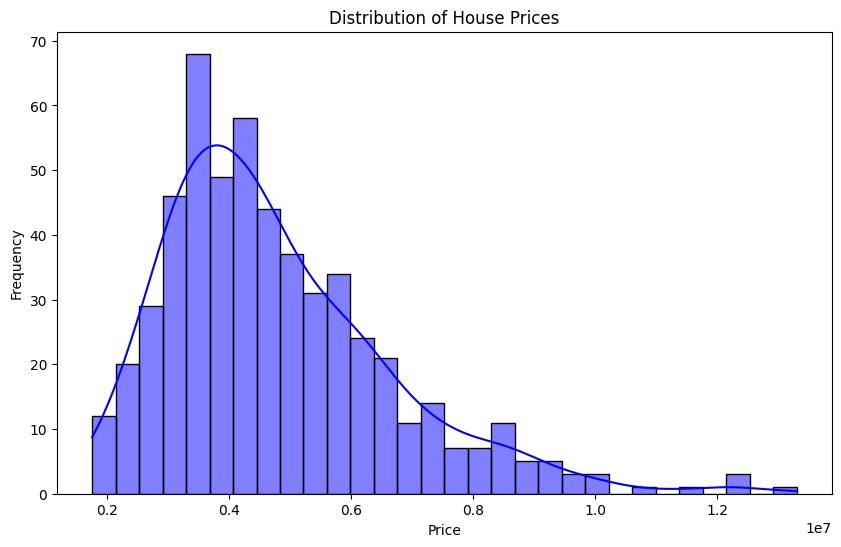

Skewness of Price: 1.212


In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


print(f"Skewness of Price: {df['price'].skew():.3f}")

## Select Traget vareble and drop the rest

In [61]:
X = df.drop('price', axis=1)
Y = df['price']

print("\nFirst 5 rows of X:")
print(X.head())

print("\nFirst 5 rows of Y:")
print(Y.head())


First 5 rows of X:
   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  furnishingstatus  
0                0                1        2         1                 0  
1                0                1        3         0                 0  
2                0                0        2         1                 1  
3                0                1        3         1                 0  
4                0                1        2         0                 0  

First 5 rows of Y:
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: p

## import library for data spliting

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (436, 12)
Shape of X_test: (109, 12)
Shape of Y_train: (436,)
Shape of Y_test: (109,)


### Import Decession Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
DecisionTreeRegressor = DecisionTreeRegressor(random_state=42)
DecisionTreeRegressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

## Import Evaluation metrics

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Mean Squerd Error

In [69]:
Y_pred = DecisionTreeRegressor.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 2688177649082.57


### Mean Absolute Error

In [70]:
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 1222399.08


### Root Mean Squerd error

In [72]:
rms= np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"Root Mean Squared Error: {rms:.2f}")

Root Mean Squared Error: 1639566.30


### r2 error

In [74]:
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared Error: {r2:.2f}")

R-squared Error: 0.47


In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
random_forest_regressor = RandomForestRegressor(random_state=42)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [77]:
Y_pred_rf = random_forest_regressor.predict(X_test)

print("Random Forest Regressor Model Performance:")
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
print(f"Mean Squared Error: {mse_rf:.2f}")

mae_rf = mean_absolute_error(Y_test, Y_pred_rf)
print(f"Mean Absolute Error: {mae_rf:.2f}")

rms_rf = np.sqrt(mse_rf)
print(f"Root Mean Squared Error: {rms_rf:.2f}")

r2_rf = r2_score(Y_test, Y_pred_rf)
print(f"R-squared Error: {r2_rf:.2f}")

Random Forest Regressor Model Performance:
Mean Squared Error: 1963538216518.65
Mean Absolute Error: 1025289.68
Root Mean Squared Error: 1401263.08
R-squared Error: 0.61


## Summary of Activities and Insights

**1. Data Loading and Initial Inspection:**

*   We loaded the House Price dataset from a CSV file into a pandas DataFrame.
*   We displayed the first and last 14 rows to get a quick overview of the data.

**2. Data Preprocessing and Feature Engineering:**

*   We identified all categorical features in the dataset.
*   We applied Label Encoding to these 7 categorical features (mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus) to convert them into numerical representations suitable for machine learning models.

**3. Exploratory Data Analysis (EDA):**

*   **Correlation Analysis**: We generated a correlation heatmap to understand the relationships between different features and the target variable (`price`).
    *   **Strong Positive Correlations with Price (r > 0.5)**: `area` (0.54) and `bathrooms` (0.52) were identified as strong drivers of house price.
    *   **Moderate Positive Correlations with Price (0.3 < r <= 0.5)**: `stories` (0.42), `airconditioning` (0.45), `parking` (0.38), `bedrooms` (0.37), `prefarea` (0.33), and `mainroad` (0.30) showed moderate positive relationships.
    *   **Weak or Negative Correlations**: `furnishingstatus` (-0.30) showed a weak negative correlation, suggesting that as `furnishingstatus` values increased (from furnished to unfurnished), the price tended to decrease.
*   **Skewness Analysis**: We calculated the skewness for 'bedrooms' and visualized the distribution of 'price', noting its positive skewness.

**4. Data Splitting:**

*   We separated the features (X) from the target variable (Y), which is 'price'.
*   The dataset was then split into training (80%) and testing (20%) sets to ensure our models are evaluated on unseen data.

**5. Model Training and Evaluation:**

**a) Decision Tree Regressor:**

*   We trained a `DecisionTreeRegressor` model on the training data.
*   Its performance on the test set was evaluated using:
    *   Mean Squared Error (MSE): 2688177649082.57
    *   Mean Absolute Error (MAE): 1222399.08
    *   Root Mean Squared Error (RMSE): 1639566.30
    *   R-squared Error (R2): 0.47

**b) Random Forest Regressor:**

*   We then trained a `RandomForestRegressor` model, which is an ensemble method, on the same training data.
*   Its performance on the test set was evaluated:
    *   Mean Squared Error (MSE): 1963538216518.65
    *   Mean Absolute Error (MAE): 1025289.68
    *   Root Mean Squared Error (RMSE): 1401263.08
    *   R-squared Error (R2): 0.61

**Conclusion:**

Comparing the two models, the **Random Forest Regressor** demonstrated better performance with an R-squared score of 0.61, indicating that it explains about 61% of the variance in house prices. This is significantly better than the Decision Tree Regressor's R-squared of 0.47. The Random Forest also achieved lower Mean Squared Error, Mean Absolute Error, and Root Mean Squared Error, confirming its superior predictive capability for this dataset.

The features `area` and `bathrooms` were identified as the most influential factors in determining house prices based on our correlation analysis.